In [11]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [12]:
df = pd.read_csv(r"C:\Users\Soumesh\Documents\Pandas notebooks\datasets\INC 5000 Companies 2019.csv")
df.head(10)

rank                              name state        revenue    growth_%  \
0     1                          Freestar    AZ   36.9 Million  36680.3882   
1     2                       FreightWise    TN   33.6 Million  30547.9317   
2     3                 Cece's Veggie Co.    TX   24.9 Million  23880.4852   
3     4                          LadyBoss    NM   32.4 Million  21849.8925   
4     5                            Perpay    PA   22.5 Million  18166.4070   
5     6                       Cano Health    FL  271.8 Million  14183.4118   
6     7                     Bear Mattress    NJ   20.5 Million  13480.7310   
7     8         Connected Solutions Group    VA   23.3 Million  12700.6588   
8     9  Providence Healthcare Management    OH  225.9 Million  12564.5364   
9    10                               NOM    CA   21.4 Million  11996.2964   

                       industry  workers  previous_workers  founded  \
0       Advertising & Marketing     40.0                 5     2015   
1    Logistics & Transportation     39.0                 8     2015   
2               Food & Beverage    190.0                10     2015   
3  Consumer Products & Services     57.0                 2     2014   
4                        Retail     25.0                 6     2014   
5                        Health    742.0                18     2009   
6  Consumer Products & Services     12.0                 1     2014   
7            Telecommunications     72.0                 1     2015   
8                        Health     60.0                10     2008   
9       Advertising & Marketing     37.0                 5     2014   

   yrs_on_list          metro            city  
0            1        Phoenix         Phoenix  
1            1      Nashville       Brentwood  
2            1         Austin          Austin  
3            1            NaN     Albuquerque  
4            1   Philadelphia    Philadelphia  
5            1          Miami           Miami  
6            1  New York City         Hoboken  
7            1   Richmond, VA  Mechanicsville  
8            1      Cleveland       Cleveland  
9            1    Los Angeles     Los Angeles

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              5012 non-null   int64  
 1   name              5012 non-null   object 
 2   state             5012 non-null   object 
 3   revenue           5012 non-null   object 
 4   growth_%          5012 non-null   float64
 5   industry          5012 non-null   object 
 6   workers           5011 non-null   float64
 7   previous_workers  5012 non-null   int64  
 8   founded           5012 non-null   int64  
 9   yrs_on_list       5012 non-null   int64  
 10  metro             4199 non-null   object 
 11  city              5012 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 470.0+ KB


In [27]:
df.isna().sum()

rank                   0
name                   0
state                  0
revenue_in_millions    0
growth_%               0
industry               0
workers                0
previous_workers       0
founded                0
yrs_on_list            0
metro                  0
city                   0
dtype: int64

### Datatype of revenue changed from object to float

In [15]:
df['revenue'] = df['revenue'].replace({'Million':"","Billion": "*1000"},regex=True).map(pd.eval)

In [ ]:
df["revenue_in_millions"].astype("float64")

### Renamed 'revenue' to 'revenue_in_millions'

In [16]:
df.rename(columns={"revenue" : "revenue_in_millions"}, inplace=True)

#### The 'metro' column contains null values. So the null values are replaced by mode value of the 'metro' column and drop NaN value from 'workers' column

In [20]:
metro_mode_value = df['metro'].mode()

In [24]:
df["metro"].fillna(metro_mode_value[0], inplace=True)

In [26]:
df.dropna(inplace=True)

#### Mean revenue of Industry

In [45]:
mean_of_revenue = df.groupby("industry")["revenue_in_millions"].mean()
mean_of_revenue


industry
Advertising & Marketing          18.908384
Business Products & Services     28.601829
Computer Hardware                31.178125
Construction                     58.422571
Consumer Products & Services     72.295223
Education                        20.835714
Energy                           80.221795
Engineering                      32.954321
Environmental Services           22.506977
Financial Services               40.004184
Food & Beverage                  39.855906
Government Services              59.391949
Health                          109.330056
Human Resources                  73.582166
IT Management                    22.577536
IT Services                      19.130233
IT System Development            21.088333
Insurance                        58.742857
Logistics & Transportation      101.293011
Manufacturing                    33.303315
Media                            16.708696
Real Estate                      34.061111
Retail                           66.552761
Se

Text(0, 0.5, 'Average Revenue (in millions USD)')

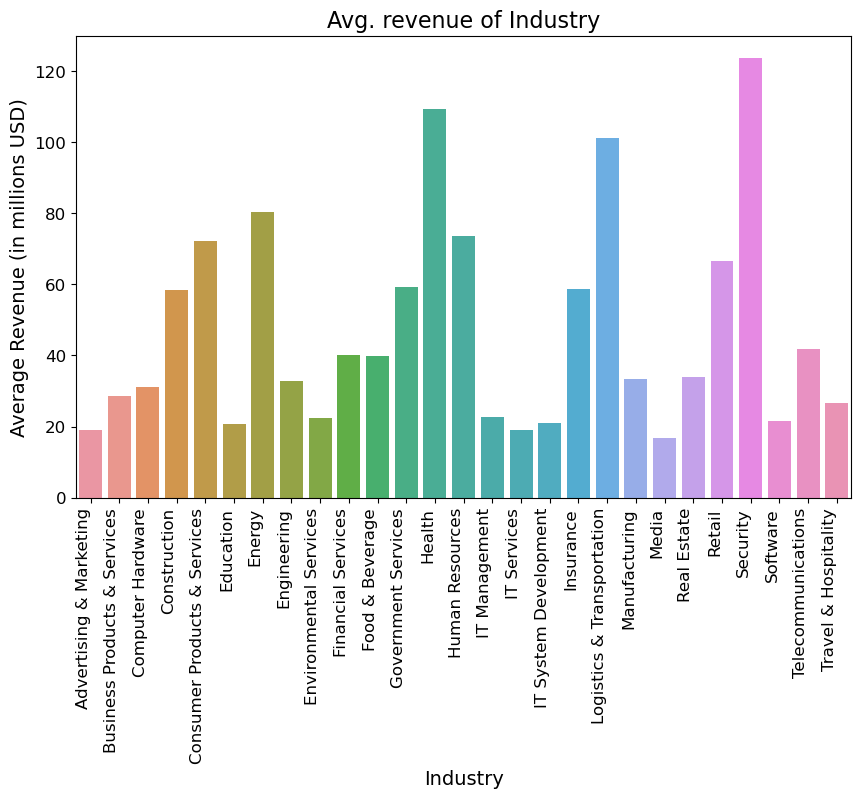

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x = mean_of_revenue.index, y = mean_of_revenue.values)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.title("Avg. revenue of Industry", fontsize = 16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Average Revenue (in millions USD)', fontsize=14)

As per the plot, we can conclude that the Security industry has highest mean revenue of 123.747761 million USD. And Media industry has the lowest mean revenue at 16.708696 million USD.

#### Which industries are most and least represented in the list?
Business Products & Services industry(492) has highest number of companies and Computer Hardware has lowest numner of companies (32)

In [50]:
industry_count = df["industry"].value_counts().sort_values()
industry_count


Computer Hardware                32
Environmental Services           43
IT Services                      43
Media                            46
Travel & Hospitality             57
Security                         67
Education                        70
Insurance                        70
Energy                           78
Telecommunications               79
Engineering                      81
IT System Development           120
Food & Beverage                 127
Human Resources                 157
Retail                          163
Manufacturing                   181
Logistics & Transportation      186
Real Estate                     198
Government Services             236
Financial Services              239
IT Management                   276
Consumer Products & Services    314
Construction                    350
Health                          356
Software                        461
Advertising & Marketing         489
Business Products & Services    492
Name: industry, dtype: int64

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600')])

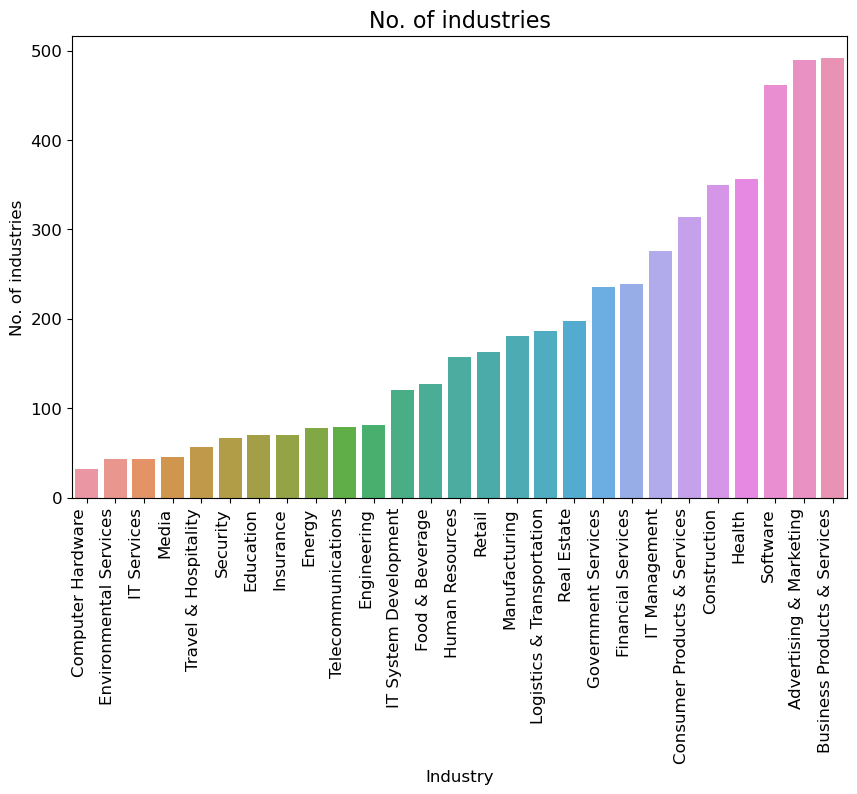

In [55]:
plt.figure(figsize = (10, 6))
sns.barplot(x = industry_count.index, y = industry_count.values)
plt.title("No. of industries", fontsize= 16)
plt.xlabel("Industry", fontsize= 12)
plt.ylabel("No. of industries", fontsize= 12)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)

#### No. of companies of a state
California has 712 companies where as Pennsylvania has 2 companies

In [58]:
no_companies = df["state"].value_counts()
no_companies

CA    712
TX    467
FL    384
NY    300
VA    288
IL    241
GA    219
PA    172
OH    160
CO    156
NC    135
MA    133
MD    130
NJ    128
UT    123
AZ    104
WA    101
TN     84
MI     82
MN     81
MO     75
AL     64
IN     63
OR     59
SC     56
WI     49
DC     43
CT     37
LA     37
KY     34
NV     33
IA     31
OK     28
KS     27
NE     27
ID     21
NH     20
SD     14
DE     11
ME     11
MT     11
ND     10
AR     10
NM      7
WV      7
WY      6
VT      5
RI      5
MS      4
HI      4
PR      2
Name: state, dtype: int64

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700'),
  Text(0, 800.0, '800')])

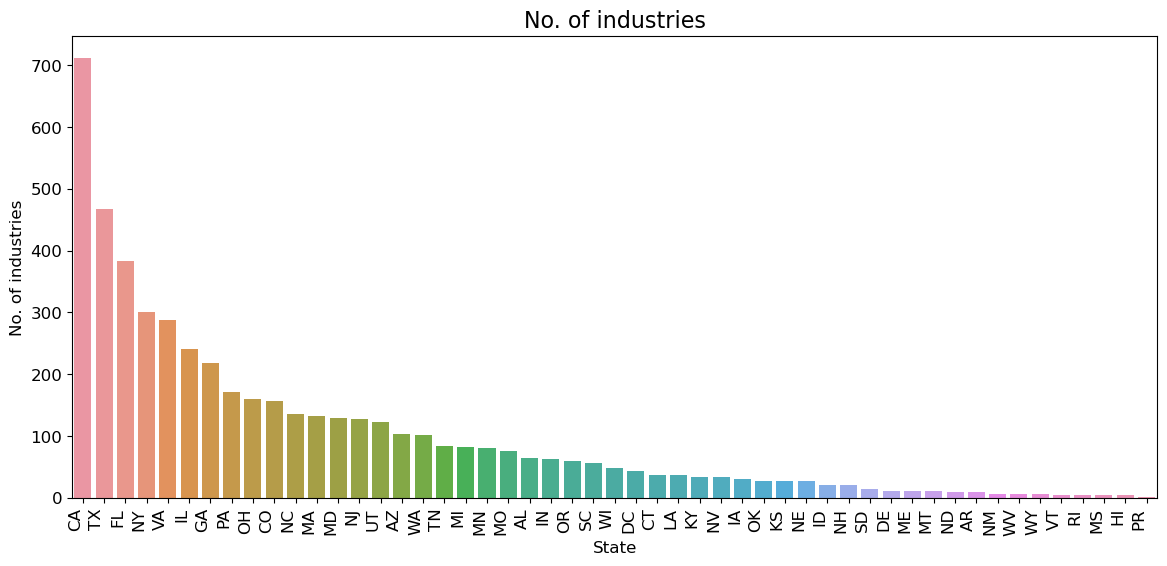

In [61]:
plt.figure(figsize = (14, 6))
sns.barplot(x = no_companies.index, y = no_companies.values)
plt.title("No. of industries", fontsize= 16)
plt.xlabel("State", fontsize= 12)
plt.ylabel("No. of industries", fontsize= 12)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)

#### Mean growth rate by industries
Logistics & Transportation has highest growth rate and IT Services has lowest growth rate

In [69]:
mean_growth_rate = df.groupby("industry")["growth_%"].mean().sort_values(ascending=False)
mean_growth_rate

industry
Logistics & Transportation      717.563346
Consumer Products & Services    687.534860
Food & Beverage                 668.225534
Computer Hardware               651.975244
Energy                          592.075591
Retail                          584.823802
Health                          546.911881
Software                        524.673761
Telecommunications              515.411890
Security                        490.193593
Advertising & Marketing         486.685136
Government Services             485.308360
Environmental Services          458.554665
Financial Services              423.942329
Real Estate                     417.554633
Media                           413.729200
IT System Development           385.909106
Education                       384.560157
Construction                    358.093255
Travel & Hospitality            346.417214
Manufacturing                   333.701503
Business Products & Services    313.472373
Insurance                       306.150356
Hu

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700'),
  Text(0, 800.0, '800')])

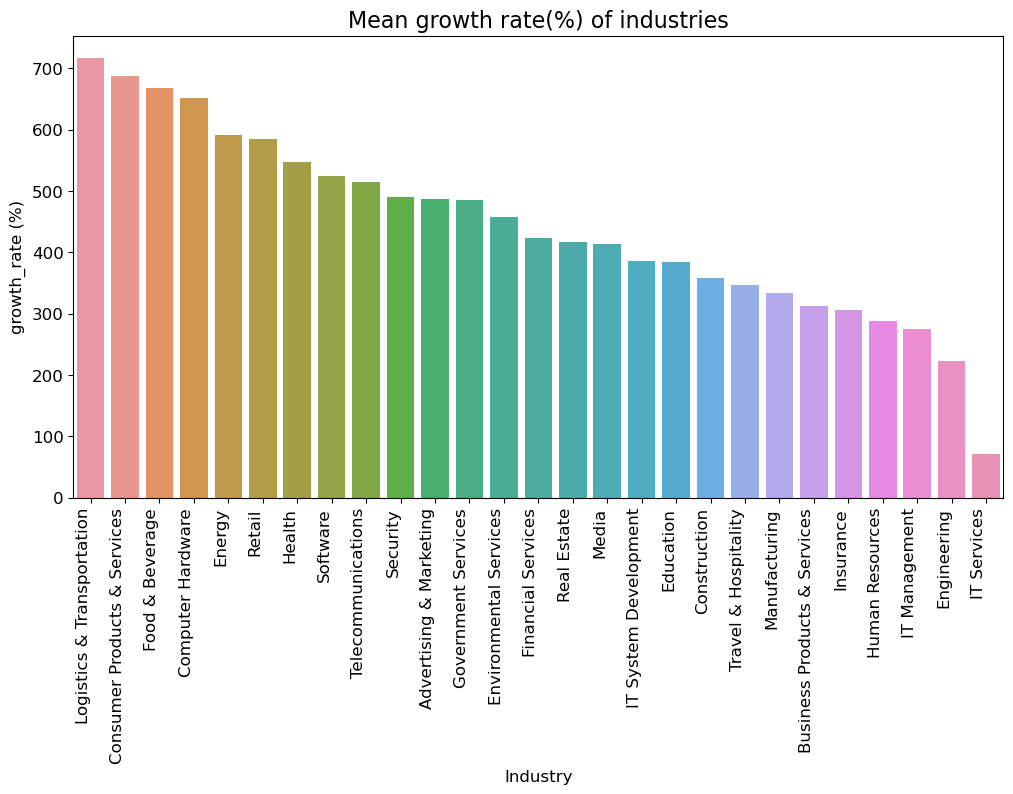

In [73]:
plt.figure(figsize = (12, 6))
sns.barplot(x = mean_growth_rate.index, y = mean_growth_rate.values)
plt.title("Mean growth rate(%) of industries", fontsize= 16)
plt.xlabel("Industry", fontsize= 12)
plt.ylabel("growth_rate (%)", fontsize= 12)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)

#### Companies founded year distribution

In [75]:
founded_year = df["founded"].value_counts()
founded_year

2014    466
2012    440
2013    431
2011    377
2009    363
       ... 
1917      1
1902      1
1929      1
1939      1
1927      1
Name: founded, Length: 83, dtype: int64

(array([  0., 100., 200., 300., 400., 500.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500')])

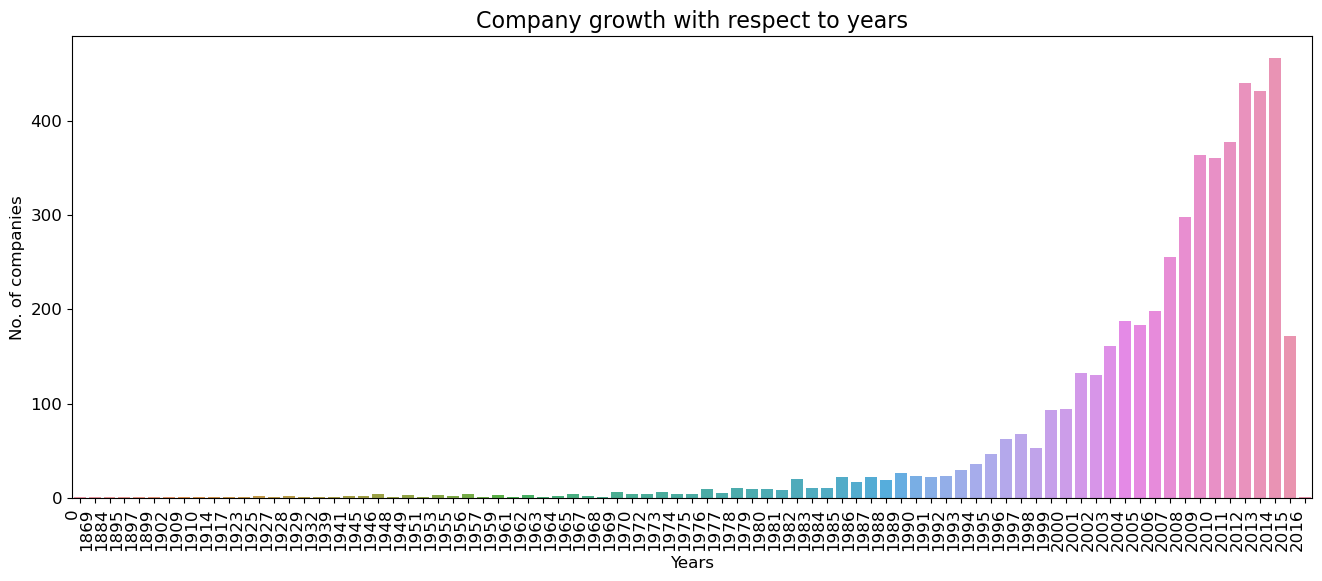

In [90]:
plt.figure(figsize = (16, 6))
sns.barplot(x = founded_year.index, y = founded_year.values)
plt.title("Company growth with respect to years", fontsize= 16)
plt.xlabel("Years", fontsize= 12)
plt.ylabel("No. of companies", fontsize= 12)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)

#### company which was founded last year and Ranked under Top 100

In [92]:
df[(df["founded"] == 2015) & (df["rank"] <= 100)]

rank                           name state  revenue_in_millions  \
0       1                       Freestar    AZ                 36.9   
1       2                    FreightWise    TN                 33.6   
2       3              Cece's Veggie Co.    TX                 24.9   
7       8      Connected Solutions Group    VA                 23.3   
13     14                    YieldStreet    NY                 19.1   
15     16               Anchor Worldwide    NY                 10.7   
19     20                Kindred Bravely    CA                  9.6   
20     21        Tailor Made Compounding    KY                 10.2   
23     24                       Printify    CA                 10.5   
24     25                        Awardco    UT                  8.9   
25     26  Pegasus Optimization Managers    TX                128.2   
29     30                       Bendcare    FL                156.0   
54     55                      Dropified    AL                  5.1   
57     58                 Ooze Wholesale    MI                 25.9   
65     66               CityLift Parking    CA                 10.7   
71     72      Sky Marketing Corporation    TX                  4.7   
76     77             Patton Warehousing    PA                  8.2   
79     80                         Wandrd    UT                  4.7   
81     82               Dynamic Logistix    KS                 54.4   
85     85                       Loanatik    AZ                  9.0   
86     86                   SupportNinja    TX                  4.5   
88     88                      Cisoshare    CA                  3.9   
89     89                    DigitalOnUS    CA                 10.4   
100   100                Powerhome Solar    NC                102.9   

       growth_%                      industry  workers  previous_workers  \
0    36680.3882       Advertising & Marketing     40.0                 5   
1    30547.9317    Logistics & Transportation     39.0                 8   
2    23880.4852               Food & Beverage    190.0                10   
7    12700.6588            Telecommunications     72.0                 1   
13   10561.7147            Financial Services     66.0                10   
15    9753.2010       Advertising & Marketing    110.0                 3   
19    8543.9808  Consumer Products & Services     35.0                 2   
20    8327.0956                        Health     45.0                 1   
23    7926.4244                      Software     70.0                 5   
24    7478.1478                      Software     42.0                 2   
25    7426.8072                        Energy    191.0                14   
29    6900.2519                        Health     37.0                 6   
54    4971.4549  Business Products & Services     30.0                 2   
57    4899.0269  Consumer Products & Services     30.0                 6   
65    4401.8691                  Construction     40.0                 5   
71    4279.7746  Consumer Products & Services     30.0                 3   
76    4138.1126    Logistics & Transportation     78.0                11   
79    4088.0160  Consumer Products & Services     12.0                 2   
81    3839.8420    Logistics & Transportation     50.0                 4   
85    3692.3510            Financial Services     19.0                 3   
86    3683.6824  Business Products & Services    463.0                22   
88    3623.0563                      Security     25.0                 3   
89    3534.7663         IT System Development    178.0                11   
100   3307.1657                  Construction    585.0                15   

     founded  yrs_on_list               metro                 city  
0       2015            1             Phoenix              Phoenix  
1       2015            1           Nashville            Brentwood  
2       2015            1              Austin               Austin  
7       2015            1        Richmond, VA       

#### Company with the largest new hire

In [94]:
df["new_workers"] = df["workers"] - df["previous_workers"]

In [98]:
index_of_company = df["new_workers"].sort_values(ascending= False).index
index_of_company

Int64Index([1621, 3752, 3403, 1336, 3172, 1118, 4110,  427, 2927, 4985,
            ...
            2715, 4979, 4583, 3627, 4153, 4270, 4136, 4409, 1076, 4567],
           dtype='int64', length=5011)

In [100]:
df.iloc[index_of_company[0]]

rank                               1617
name                   Allied Universal
state                                CA
revenue_in_millions              5800.0
growth_%                       255.1902
industry                       Security
workers                        155000.0
previous_workers                  36469
founded                            1957
yrs_on_list                          10
metro                       Los Angeles
city                          Santa Ana
new_workers                    118531.0
Name: 1621, dtype: object